In [129]:
import qiskit as q
from math import sqrt
from numpy import arccos
from qiskit.execute_function import execute
from qiskit.visualization import plot_histogram

In [130]:
def prepare_register(n):
    quantum = q.QuantumRegister(n)
    classical = q.ClassicalRegister(n)
    register = q.QuantumCircuit(quantum, classical)
    register.x(0)
    
    count = n
    for i in range(0, n - 1):
        angle = 2.0* arccos(1.0 / sqrt(count))
        register.cry(angle, i, i + 1)
        register.cx(i + 1, i)
        count -= 1
    
    return register

In [131]:
register = prepare_register(5)
register.measure_all()
register.draw()

┌───┐              ┌───┐                                               »
q220_0: ┤ X ├──────■───────┤ X ├───────────────────────────────────────────────»
        └───┘┌─────┴──────┐└─┬─┘            ┌───┐                              »
q220_1: ─────┤ Ry(2.2143) ├──■───────■──────┤ X ├──────────────────────────────»
             └────────────┘     ┌────┴─────┐└─┬─┘              ┌───┐           »
q220_2: ────────────────────────┤ Ry(2π/3) ├──■────────■───────┤ X ├───────────»
                                └──────────┘     ┌─────┴──────┐└─┬─┘           »
q220_3: ─────────────────────────────────────────┤ Ry(1.9106) ├──■───────■─────»
                                                 └────────────┘     ┌────┴────┐»
q220_4: ────────────────────────────────────────────────────────────┤ Ry(π/2) ├»
                                                                    └─────────┘»
 c20: 5/═══════════════════════════════════════════════════════════════════════»
                                                                               »
meas: 5/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«              ░ ┌─┐            
«q220_0: ──────░─┤M├────────────
«              ░ └╥┘┌─┐         
«q220_1: ──────░──╫─┤M├─────────
«              ░  ║ └╥┘┌─┐      
«q220_2: ──────░──╫──╫─┤M├──────
«        ┌───┐ ░  ║  ║ └╥┘┌─┐   
«q220_3: ┤ X ├─░──╫──╫──╫─┤M├───
«        └─┬─┘ ░  ║  ║  ║ └╥┘┌─┐
«q220_4: ──■───░──╫──╫──╫──╫─┤M├
«              ░  ║  ║  ║  ║ └╥┘
« c20: 5/═════════╬══╬══╬══╬══╬═
«                 ║  ║  ║  ║  ║ 
«meas: 5/═════════╩══╩══╩══╩══╩═
«                 0  1  2  3  4

In [132]:
backend = q.BasicAer.get_backend('qasm_simulator')
job = execute(register, backend, shots=1)
result = job.result()

{'00001 00000': 1}
<class 'qiskit.result.counts.Counts'>


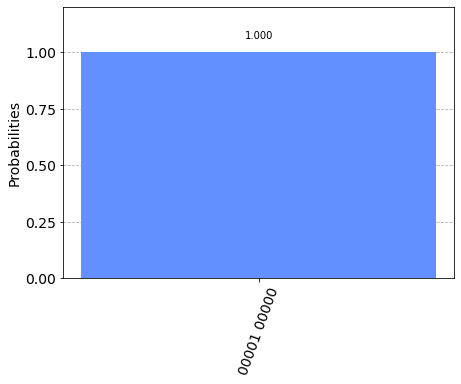

In [133]:
counts = result.get_counts()
print(counts)
print(type(counts))
plot_histogram(counts)

In [134]:
string = counts.keys()
bitstring = ""
for i in string:
    bitstring = i

def get_num(bitstring):
    for i in range(len(bitstring)):
        if bitstring[i] == "1":
            return i + 1

print(f"Random Number: {get_num(bitstring)}")

Random Number: 5
